## Getting Started
To prepare LibRealSense Python environment, follow the steps below:

- Download [PyCharm](https://www.jetbrains.com/pycharm/download/#section=windows) tool to run Python code
- Download [Python 3.9](https://www.python.org/downloads/release/python-395/) or [Python 3.7](https://www.python.org/downloads/release/python-379/)
- Download [get-pip.py](https://bootstrap.pypa.io/get-pip.py) and run the following commands in PyCharm terminal: 
    - ***python get-pip.py*** &emsp;&emsp;&emsp;&emsp;&nbsp;Pip tool to install Python packages
    - ***pip install pyrealsense2*** &emsp;&nbsp;Intel RealSense cross-platform open-source API
    - ***pip install numpy*** &emsp;&emsp;&emsp;&emsp;&nbsp;Fundamental package for scientific computing
    - ***pip install matplotlib*** &emsp;&emsp;&ensp;&nbsp;2D plotting library producing publication quality figures
    - ***pip install opencv-python***&nbsp;&nbsp;OpenCV packages for Python


* PyCharm Terminal :
![alttext](images/pyrealsense2.png "PyCharm Terminal")
    

In [1]:
import os
import numpy as np                        # Fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from IPython.display import clear_output  # Clear the output of the current cell receiving output
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment is Ready")

Environment is Ready


# Creating a Pipeline

This serves as a top-level API for streaming and processing frames.
<br> 
Pipeline simplifies user interaction with the device and computer vision processing modules. The API abstracts camera configuration and streaming.

In [2]:
pipe = rs.pipeline()                      # Create a pipeline
cfg = rs.config()                         # Create a config to configure the pipeline to stream
print("Pipeline is created")

Pipeline is created


## Find RealSense Devices

In [4]:
print("Searching Devices..")
selected_devices = []                    # Store found ROSBAG device(s)
cfg.enable_device_from_file('bear.bag')
pipe_wrapper = rs.pipeline_wrapper(pipe)
pipe_profile = cfg.resolve(pipe_wrapper)
selected_devices.append(pipe_profile.get_device())
if not selected_devices:
    print("No ROSBAG device is available !")
else:
    print(selected_devices[0].get_info(rs.camera_info.name))
    

Searching Devices..
Intel RealSense D435I


## Find Depth and RGB Sensors

In [5]:
rgb_sensor = depth_sensor = None

for device in selected_devices:                         
    print("Available sensors in device:", device.get_info(rs.camera_info.name))
    for s in device.sensors:                              # Show available sensors in each device
        if s.get_info(rs.camera_info.name) == 'RGB Camera':
            print(" - found RGB sensor")
            rgb_sensor = s                                # Set RGB sensor
        if s.get_info(rs.camera_info.name) == 'Stereo Module':
            depth_sensor = s                              # Set Depth sensor
            print(" - found Depth sensor")
    if not rgb_sensor:
        print("The demo requires Depth camera with Color sensor")

Available sensors in device: Intel RealSense D435I
 - found Depth sensor
 - found RGB sensor


## Displaying Depth and Color Frames

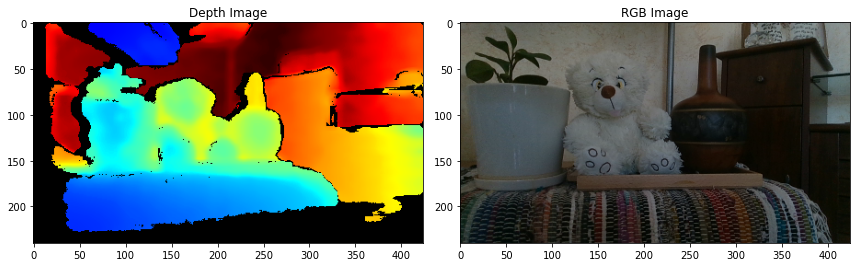

Done!


In [6]:
colorizer = rs.colorizer()
profile = pipe.start(cfg)                                 # Configure and start the pipeline
depth_frame = color_frame = None                          # Initialize Depth and RGB frames

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4)) # Set figure: 2 colomns for Depth and RGB frames
title = ["Depth Image", "RGB Image"]                      # Title for each figure


for _ in range(5):                                        # Display 5 framesets
    frameset = pipe.wait_for_frames()                     # Store next frameset for processing 
    depth_frame = frameset.get_depth_frame()              # Set depth frame from recent frameset
    color_frame = frameset.get_color_frame()              # Set RGB frame from recent frameset
    colorized_streams = []                                # Store arrived frames after being colorized
     
    if depth_frame:                                       # Run colorizer only on arrived frames
        colorized_streams.append(np.asanyarray(colorizer.colorize(depth_frame).get_data()))
    if color_frame:                                       
        colorized_streams.append(np.asanyarray(colorizer.colorize(color_frame).get_data()))
    
    for i, ax in enumerate(axs.flatten()):                # Iterate over all (Depth and RGB) colorized frames
        plt.sca(ax)                                       # Set the current Axes and Figure
        plt.imshow(colorized_streams[i])                  # colorized frame to display
        plt.title(title[i])                               # Add title for each subplot
    clear_output(wait=True)                               # Wait to clear the output until new output is available
    plt.tight_layout()                                    # Adjusts subplot params to fit in to the figure area
    plt.pause(1)                                          # Pause for 1 second before capturing next framest
    
pipe.stop()                                               # Stop the pipeline
print("Done!")